In [5]:
import pandas as pd
import pyvis
import snap

In [2]:
data = pd.read_csv('/Users/diegoportillaamarillas/Downloads/facebook_combined.txt', sep=' ', header=None)
data.columns = ['person1', 'person2']

sample = data.sample(2000, random_state=1)

In [3]:
sample.head()

,person1,person2
74346,2839,3064
62630,2309,2590
199,0,200
51398,2088,2468
27375,1319,1568


In [52]:
net = pyvis.network.Network(
    notebook=True,
    cdn_resources='remote',
    bgcolor='#222222',
    font_color='white',
    height='750px',
    width='100%',
)

nodes= list(set([*sample.person1, *sample.person2]))
edges = sample.values.tolist()
net.add_nodes(nodes)
net.add_edges(edges)

## Degree Distribution, Clustering, Diameter


In [41]:
fb_graph = snap.LoadEdgeList(snap.TNGraph, '/Users/diegoportillaamarillas/Downloads/facebook_combined.txt', 0, 1)

In [58]:
print(f'Edges:{fb_graph.GetEdges()} Nodes: {fb_graph.GetNodes()}')

Edges:88234 Nodes: 4039


In [43]:
random_graph = snap.GenRndGnm(snap.TNGraph, 4039, 88234)

In [74]:
fb_clust_cf = fb_graph.GetClustCf()
rdm_clust_cf = random_graph.GetClustCf()

fb_diam = fb_graph.GetBfsFullDiam(4039, True)
rdm_diam = random_graph.GetBfsFullDiam(4039, True)


fb_clust_cf, rdm_clust_cf

(0.6055467186200861, 0.010827033030595123)

In [75]:
fb_diam, rdm_diam

(17, 4)

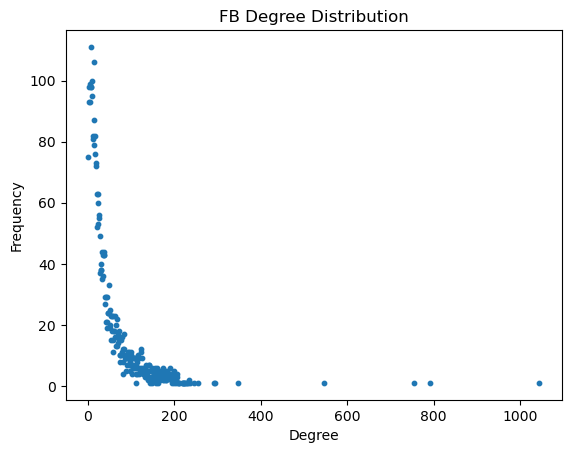

In [73]:
import matplotlib.pyplot as plt

# Get the degree sequence of the graph
degree_seq = snap.TIntV()
snap.GetDegSeqV(fb_graph, degree_seq)

# Calculate the degree frequency distribution
degree_counts = {}
for degree in degree_seq:
    degree_counts[degree] = degree_counts.get(degree, 0) + 1

# Plot the degree distribution
degrees = list(degree_counts.keys())
frequency = list(degree_counts.values())

plt.scatter(degrees, frequency, s=10, cmap='twilight')
plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.title("FB Degree Distribution")
plt.show()

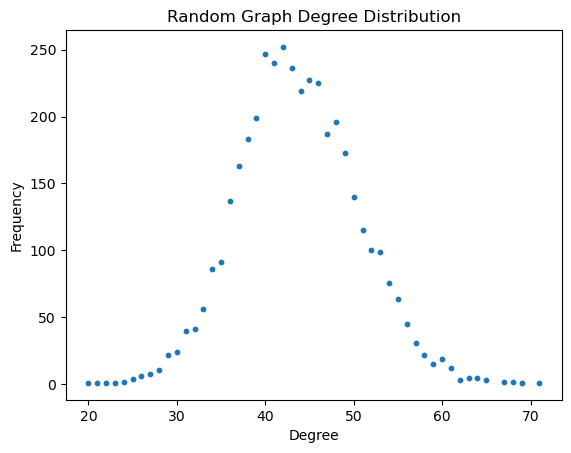

In [70]:
snap.GetDegSeqV(random_graph, degree_seq)

# Calculate the degree frequency distribution
degree_counts = {}
for degree in degree_seq:
    degree_counts[degree] = degree_counts.get(degree, 0) + 1

# Plot the degree distribution
degrees = list(degree_counts.keys())
frequency = list(degree_counts.values())

plt.scatter(degrees, frequency, s=10)
plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.title("Random Graph Degree Distribution")
plt.show()

In [76]:
Rnd = snap.TRnd(1,0)
UGraph1 = snap.GenSmallWorld(10, 3, 0, Rnd)

In [78]:
for EI in UGraph1.Edges():
    print("edge: (%d, %d)" % (EI.GetSrcNId(), EI.GetDstNId()))

edge: (0, 1)
edge: (0, 2)
edge: (0, 3)
edge: (0, 7)
edge: (0, 8)
edge: (0, 9)
edge: (1, 2)
edge: (1, 3)
edge: (1, 4)
edge: (1, 8)
edge: (1, 9)
edge: (2, 3)
edge: (2, 4)
edge: (2, 5)
edge: (2, 9)
edge: (3, 4)
edge: (3, 5)
edge: (3, 6)
edge: (4, 5)
edge: (4, 6)
edge: (4, 7)
edge: (5, 6)
edge: (5, 7)
edge: (5, 8)
edge: (6, 7)
edge: (6, 8)
edge: (6, 9)
edge: (7, 8)
edge: (7, 9)
edge: (8, 9)
